# Exploratory Data Analysis of Environmental & Geographic Data

Useful resources:
- [Top 10 Tips for GeoPandas](https://medium.com/@janosovm/top-10-tips-for-geopandas-7aef191957a3)

In [246]:
import csv
import ast
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from datetime import datetime
from shapely.geometry import Point

## Load data

In [7]:
gdf_geo = gpd.read_feather(
    'geographic_merged_with_openstreetmap.feather'
)

/var/folders/g8/tc9k918x5hncpxzn40y8c00h0000gn/T/ipykernel_4609/3238142314.py:1: UserWarning: Multiple non-primary geometry columns read from Parquet/Feather file. The first column read was promoted to the primary geometry.
  gdf_geo = gpd.read_feather(


In [9]:
gdf_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GID_L0                   237 non-null    object  
 1   GID_L1                   237 non-null    object  
 2   GID_L2                   237 non-null    object  
 3   GID_L3                   237 non-null    object  
 4   COUNTRY                  237 non-null    object  
 5   NAME_L1                  237 non-null    object  
 6   NAME_L2                  237 non-null    object  
 7   NAME_L3                  237 non-null    object  
 8   GEOMETRY_L3              237 non-null    geometry
 9   NAME_ALTERNATIVES_L1     232 non-null    object  
 10  TYPE_L1                  237 non-null    object  
 11  HASC_L1                  237 non-null    object  
 12  ISO_L1                   135 non-null    object  
 13  GEOMETRY_L1              237 non-null    geometry
 14  TY

Currently `GEOMETRY_L3` is set as the _geometry_ column of the geopandas dataframe. By using the `plot()` method, it's possible to render a map of Sudan with district subdivisions visualized. By setting `GEOMETRY_L2` or `GEOMETRY_L1` as the active geometry column and using plot, district or state borders would be displayed respectively on Sudan's map.

<Axes: >

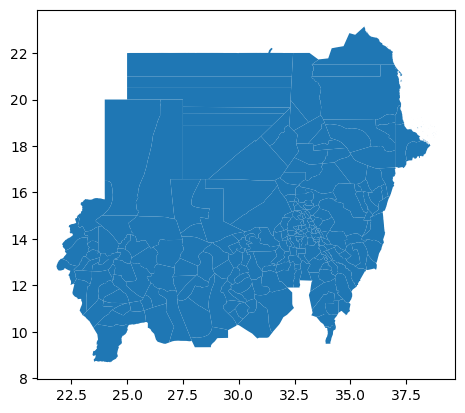

In [249]:
gdf_geo.plot()

<Axes: >

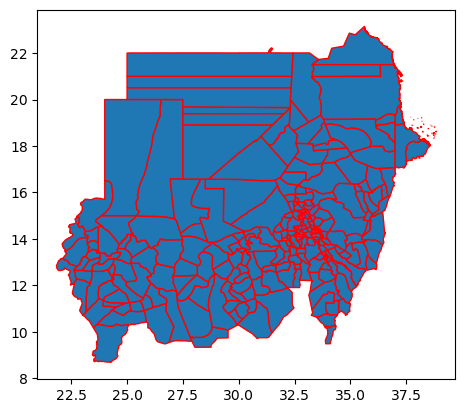

In [264]:
# highlight borders
gdf_geo.plot(edgecolor = 'red')

Dissolved GeoDataFrame: 



,GEOMETRY_L3,GID_L0,GID_L1,GID_L2,GID_L3,COUNTRY,NAME_L2,NAME_L3,NAME_ALTERNATIVES_L1,TYPE_L1,...,COORDINATES_L2,COORDINATES_L3,CENTROID_COORDINATES_L1,CENTROID_COORDINATES_L2,CENTROID_COORDINATES_L3,SENTINEL_2_NDVI_L3,SENTINEL_2_NDWI_L3,WEATHER_WEEKLY_L1,MAJOR_CITIES_L1,INFRASTRUCTURE_L2
NAME_L1,,,,,,,,,,,,,,,,,,,,,
AlJazirah,"POLYGON ((33.0613 13.9852, 33.0539 13.9723, 33...",SDN,SDN.1_1,SDN.1.1_1,SDN.1.1.1_1,Sudan,AlKamlin,ElKamlin,Gezira,State,...,"[[[[33.1141 14.8749], [32.9916 14.9108], [32.9...","[[[[32.9784 15.1733], [33.0415 15.2452], [33.0...","[14.582373531656884, 33.345453919938265]","[15.097663580487422, 32.96771659913109]","[15.083964443779728, 33.11378956689792]","{'data': [{'interval_from': '2015-10-20', 'int...","{'data': [{'interval_from': '2015-10-20', 'int...","{'2022-01-01': {'cloud_cover': 65.0, 'humidity...",None,"[ { ""type"": ""way"", ""id"": 7852182, ""nodes"": [ 1..."
AlQadarif,"POLYGON ((34.7964 13.1404, 34.7889 13.1541, 34...",SDN,SDN.2_1,SDN.2.1_1,SDN.2.1.1_1,Sudan,AlFaw,ElButana,Gedarif|Gadarif|Gedaref|Gederaf,State,...,"[[[[35.8921 14.782 ], [35.9266 14.7774], [35.9...","[[[[34.09 14.3931], [34.0857 14.4036], [34.2...","[14.171129112695002, 35.22086559072147]","[14.86562507593909, 34.743409228608634]","[14.886492747816522, 34.68836656263316]","{'data': [{'interval_from': '2015-10-20', 'int...","{'data': [{'interval_from': '2015-10-20', 'int...","{'2022-01-01': {'cloud_cover': 100.0, 'humidit...",None,"[ { ""type"": ""way"", ""id"": 10983756, ""nodes"": [ ..."


Number of records before the dissolve (nr. of district subdivisions in Sudan):  237 

Number of records after the dissolve (nr. of states in Sudan):  18 



<Axes: >

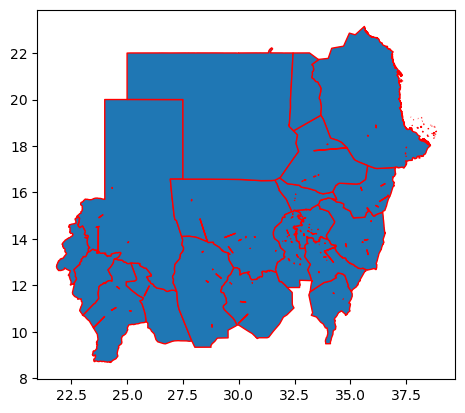

In [262]:
# Dissolve polygons by states to combine district subdivisions into states
gdf_geo_dissolved = gdf_geo.dissolve(by='NAME_L1')

# Display the dissolved GeoDataFrame
print("Dissolved GeoDataFrame:", "\n")
display(gdf_geo_dissolved.head(2))

# Print the size of the GeoDataFrame before and after the operation
print("Number of records before the dissolve (nr. of district subdivisions in Sudan): ", len(gdf_geo), "\n")
print("Number of records after the dissolve (nr. of states in Sudan): ", len(gdf_geo_dissolved), "\n")

# Plot the dissolved GeoDataFrame to visualize the combined continents
gdf_geo_dissolved.plot(edgecolor = 'red')

### Satellite Data Analysis (NDVI and NDWI):

Analyze trends in vegetation (NDVI) and water content (NDWI) over time at the district subdivision level.
Visualize these trends using time-series plots.
Map the NDVI and NDWI values to assess spatial patterns.

#### NDVI

The normalized difference vegetation index is a simple, but effective index for quantifying green vegetation. It is a measure of the state of vegetation health based on how plants reflect light at certain wavelengths. The value range of the NDVI is -1 to 1. Negative values of NDVI (values approaching -1) correspond to water. Values close to zero (-0.1to 0.1) generally correspond to barren areas of rock, sand, or snow. Low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).


#### NDWI

The normalized difference water index is most appropriate for water body mapping. Values of water bodies are larger than 0.5. Vegetation has smaller values. Built-up features have positive values between zero and 0.2.

In [150]:
def flatten_sentinel_data(df, column, region_col, geom_col):
    records = []
    for idx, row in df.iterrows():
        if isinstance(row[column], dict):  
            for key, values in row[column].items():
                for item in values:
                    records.append({
                        'date': pd.to_datetime(item['interval_from']),
                        'value': item['ndvi_mean'],
                        'region': row[region_col],
                        'geometry': row[geom_col]
                    })
    return pd.DataFrame(records)

In [267]:
ndvi_data = flatten_sentinel_data(gdf_geo, 'SENTINEL_2_NDVI_L3', 'NAME_L3', 'GEOMETRY_L3')
ndwi_data = flatteflatten_sentinel_datan_data(gdf_geo, 'SENTINEL_2_NDWI_L3', 'NAME_L3', 'GEOMETRY_L3')

In [268]:
# Group by date and region to calculate mean NDVI/NDWI
ndvi_trend = ndvi_data.groupby(['date', 'region'])['value'].mean().reset_index()
ndwi_trend = ndwi_data.groupby(['date', 'region'])['value'].mean().reset_index()

In [269]:
ndvi_trend.head()

,date,region,value
0,2015-10-20,AbbaIsland,0.005310
1,2015-10-20,Abbasiya,0.005310
2,2015-10-20,Abri,0.005604
3,2015-10-20,AbuDeleig,0.005310
4,2015-10-20,AbuGuta,0.005310


### Smooth NDVI and NDWI values

In [290]:
# Apply rolling average for smoothing
window_size = 15  # Smooth over a 15-day window
ndvi_trend['ndvi_smoothed'] = ndvi_trend.groupby('region')['value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
ndwi_trend['ndwi_smoothed'] = ndwi_trend.groupby('region')['value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

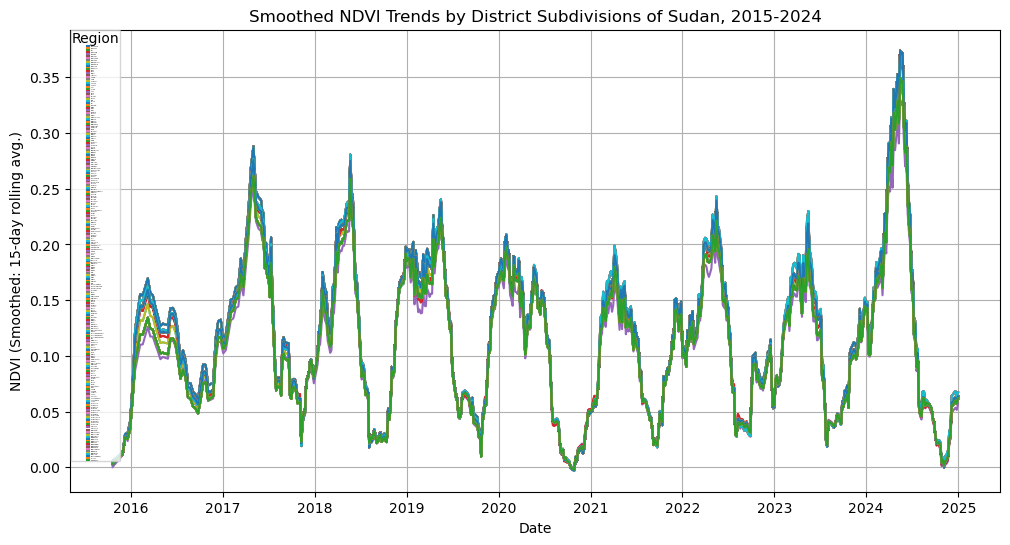

In [436]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ndvi_trend, x='date', y='ndvi_smoothed', palette='tab10', hue='region')

plt.title("Smoothed NDVI Trends by District Subdivisions of Sudan, 2015-2024", fontsize=12)
plt.xlabel("Date", fontsize=10)
plt.ylabel("NDVI (Smoothed: 15-day rolling avg.)", fontsize=10)

plt.legend(title="Region", fontsize=1, loc='upper left')

plt.grid(True)

plt.savefig("data/charts/ndvi_trends_l3.png")
plt.show()

Seems like there was a spike in the NDVI data around April-May 2024 indicating greener than usual vegetation. When looking around on news sites, this theory is verified. Sudan experienced heavy rainfalls and floods in mid 2024 according to a number of sources such as [ICPAC](https://www.icpac.net/climate-monitoring/monthly/observed-rainfall-for-april-2024/?page=2&resource_type=17&utm_source=chatgpt.com).

As for the seasonal trend, April and May coincide with the onset of the main agricultural season in Sudan. Farmers typically prepare land and sow crops during this period, contributing to a rise in vegetation cover detected by NDVI.

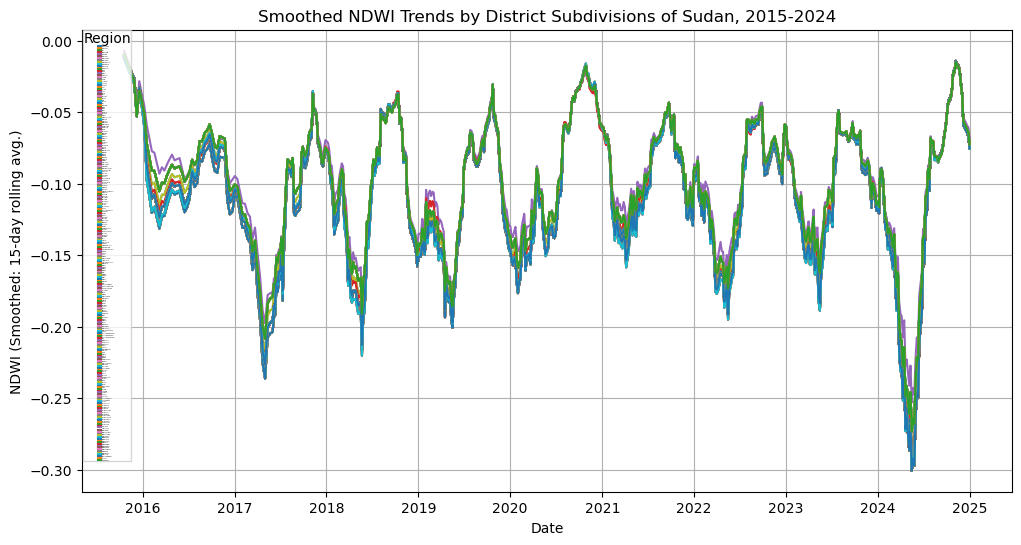

In [437]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ndwi_trend, x='date', y='ndwi_smoothed', palette='tab10', hue='region')

plt.title("Smoothed NDWI Trends by District Subdivisions of Sudan, 2015-2024", fontsize=12)
plt.xlabel("Date", fontsize=10)
plt.ylabel("NDWI (Smoothed: 15-day rolling avg.)", fontsize=10)

plt.legend(title="Region", fontsize=1, loc='upper left')

plt.grid(True)

plt.savefig("data/charts/ndwi_trends_l3.png")
plt.show()

The spikes around September of 2020 and 2024 are due to floods:
- 2020: [2020 Sudan floods - Wikipedia](https://en.wikipedia.org/wiki/2020_Sudan_floods)
- 2024: [reliefweb](https://reliefweb.int/disaster/fl-2024-000128-sdn), [UN Office for the Coordination of Humanitarian Affairs](https://www.unocha.org/publications/report/sudan/sudan-humanitarian-impact-heavy-rains-and-flooding-flash-update-no-04-5-september-2024)

Seasonal trend:
- Decrease in water content (March-May): due to dry season
- Increase in water content (June-October): due to rainy season

### Combine NDVI/NDWI and weather data

Sudan experiences four primary seasons in a year, influenced by its tropical and arid climate zones. 
These are:

**1. Dry Season**
- Timeframe: December to February
- Characteristics:
    - Cooler temperatures, especially at night.
    - Low humidity and almost no rainfall.
    - Daytime temperatures range from 20°C to 30°C, but nights can be significantly cooler.
    - This is the most pleasant time of the year in Sudan.
- Significance:
    - Agricultural off-season as rain-dependent farming is minimal.
    - Increased human and animal movement due to favorable weather.

**2. Hot Dry Season**
- Timeframe: March to May
- Characteristics:
    - Temperatures begin to rise significantly, often exceeding 40°C in many areas.
    - Very dry with little to no rainfall.
    - Dust storms, known as "haboobs," can occur.
- Significance:
    - Agricultural preparations for the rainy season begin.
    - Stress on water resources due to the extreme heat.

**3. Rainy Season (Kharif)**
- Timeframe: June to September
- Characteristics:
    - Heavy rains, especially in the southern and central parts of Sudan.
    - Temperatures remain high but slightly moderated by the rains.
    - High humidity levels.
    - Flooding is common in some regions due to intense rainfall.
- Significance:
    - Peak agricultural activity.
    - Increased vegetation and water resources.
    - A rise in mosquito populations, contributing to diseases like malaria.

**4. Post-Rainy Season (Harvest Season)**
- Timeframe: October to November
- Characteristics:
    - Transition from rainy to dry conditions.
    - Temperatures are warm but less extreme than the hot dry season.
    - Reduced humidity as rains subside.
- Significance:
    - Harvesting of crops takes place.
    - Vegetation begins to dry up, signaling the onset of the next dry season.

In [341]:
def flatten_weather_data(df, column, region_col, geom_col):
    records = []
    for idx, row in df.iterrows():
        if isinstance(row[column], dict):  
            for key, values in row[column].items():
                records.append({
                    'date': pd.to_datetime(key),
                    'precipitation': values['precipitation_total_mm'],
                    'humidity': values['humidity_percentage'],
                    'temperature_min': values['temperature_min_celsius'],
                    'temperature_max': values['temperature_max_celsius'],
                    'region': row[region_col],
                    'geometry': row[geom_col]
                })
    return pd.DataFrame(records)

In [342]:
weather_data = flatten_weather_data(gdf_geo, 'WEATHER_WEEKLY_L1', 'NAME_L3', 'GEOMETRY_L3')

In [347]:
weather_data["year"] = weather_data["date"].dt.isocalendar().year
weather_data["week"] = weather_data["date"].dt.isocalendar().week

In [349]:
weather_data.head()

,date,precipitation,humidity,temperature_min,temperature_max,region,geometry,year,week
0,2022-01-01,0.0,12.0,19.78,30.00,ElKamlin,"MULTIPOLYGON (((32.9784 15.1733, 33.0415 15.24...",2021,52
1,2022-01-08,0.0,23.0,20.60,33.98,ElKamlin,"MULTIPOLYGON (((32.9784 15.1733, 33.0415 15.24...",2022,1
2,2022-01-15,0.0,14.0,21.76,32.89,ElKamlin,"MULTIPOLYGON (((32.9784 15.1733, 33.0415 15.24...",2022,2
3,2022-01-22,0.0,17.0,16.89,29.79,ElKamlin,"MULTIPOLYGON (((32.9784 15.1733, 33.0415 15.24...",2022,3
4,2022-01-29,0.0,18.0,14.87,27.98,ElKamlin,"MULTIPOLYGON (((32.9784 15.1733, 33.0415 15.24...",2022,4


In [351]:
ndvi_trend["year"] = ndvi_trend["date"].dt.isocalendar().year
ndvi_trend["week"] = ndvi_trend["date"].dt.isocalendar().week

ndwi_trend["year"] = ndwi_trend["date"].dt.isocalendar().year
ndwi_trend["week"] = ndwi_trend["date"].dt.isocalendar().week

In [365]:
ndvi_trend_weekly = ndvi_trend.groupby(['region', 'year', 'week'])['ndvi_smoothed'].mean().reset_index()
ndwi_trend_weekly = ndwi_trend.groupby(['region', 'year', 'week'])['ndwi_smoothed'].mean().reset_index()

In [371]:
ndvi_trend_weekly.head()

,region,year,week,ndvi_smoothed
0,AbbaIsland,2015,43,0.005310
1,AbbaIsland,2015,48,0.011268
2,AbbaIsland,2015,50,0.027131
3,AbbaIsland,2015,51,0.027978
4,AbbaIsland,2015,53,0.039207


In [375]:
weather_sentinel_combined = pd.merge(weather_data, ndvi_trend_weekly[['year', 'week', 'region', 'ndvi_smoothed']], on=['year', 'week', 'region'], how='left')

In [377]:
weather_sentinel_combined = pd.merge(weather_sentinel_combined, ndwi_trend_weekly[['year', 'week', 'region', 'ndwi_smoothed']], on=['year', 'week', 'region'], how='left')

In [383]:
weather_sentinel_combined['year_week'] = weather_sentinel_combined['year'].astype(str) + '-W' + weather_sentinel_combined['week'].astype(str)

#### NDVI/NWDI and Precipitation Trends

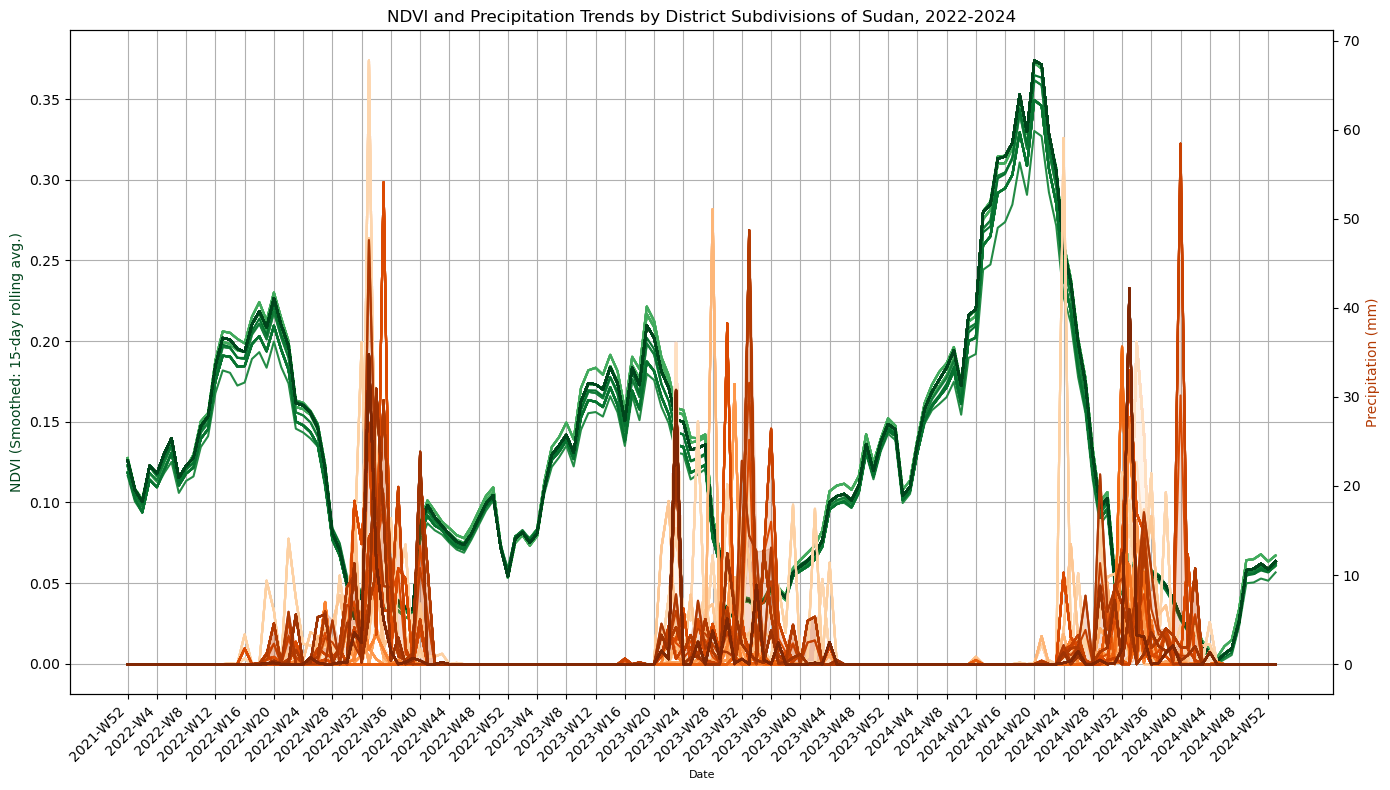

In [439]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=weather_sentinel_combined, x='year_week', y='ndvi_smoothed', hue='region', palette='Greens', legend=False)

ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot(data=weather_sentinel_combined, x='year_week', y='precipitation', hue='region', ax=ax2, palette='Oranges', legend=False)

ax.set_xticks(range(0, len(weather_sentinel_combined['year_week'].unique()), 4))  # Show every 4th week
ax.set_xticklabels(weather_sentinel_combined['year_week'].unique()[::4], rotation=45, ha='right')  # Rotate labels for readability

ax.set_ylabel('NDVI (Smoothed: 15-day rolling avg.)', fontsize=10, color='#00451C')
ax2.set_ylabel('Precipitation (mm)', fontsize=10, color='#B33A03')
ax.set_xlabel('Date', fontsize=8)
ax.set_title('NDVI and Precipitation Trends by District Subdivisions of Sudan, 2022-2024', fontsize=12)
ax.grid(True)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax2.legend(lines_1 + lines_2, labels_1 + labels_2, title="District Subdivision", fontsize=1, loc='upper right')

plt.tight_layout()

plt.savefig("data/charts/ndvi_precipitation_trends_l3.png")
plt.show()

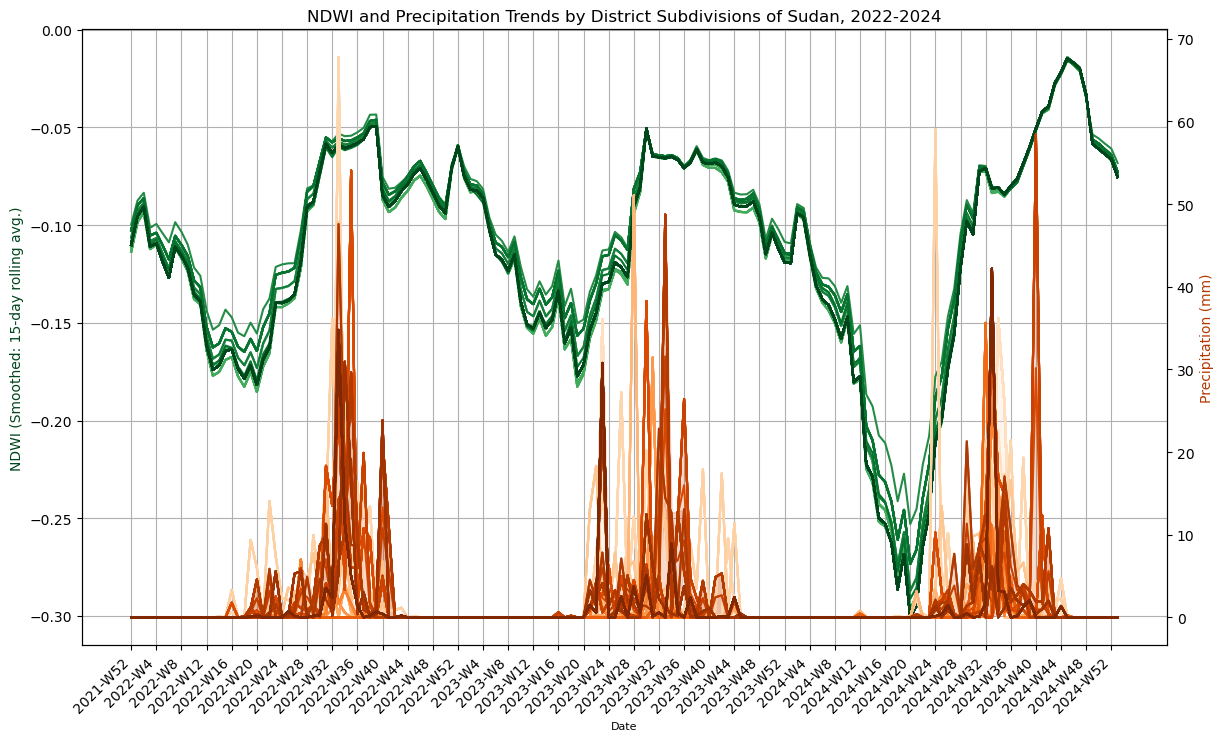

In [440]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=weather_sentinel_combined, x='year_week', y='ndwi_smoothed', hue='region', palette='Greens', legend=False)

ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot(data=weather_sentinel_combined, x='year_week', y='precipitation', hue='region', ax=ax2, palette='Oranges', legend=False)

ax.set_xticks(range(0, len(weather_sentinel_combined['year_week'].unique()), 4))  # Show every 4th week
ax.set_xticklabels(weather_sentinel_combined['year_week'].unique()[::4], rotation=45, ha='right')  # Rotate labels for readability

ax.set_ylabel('NDWI (Smoothed: 15-day rolling avg.)', fontsize=10, color='#00451C')
ax2.set_ylabel('Precipitation (mm)', fontsize=10, color='#B33A03')
ax.set_xlabel('Date', fontsize=8)
ax.set_title('NDWI and Precipitation Trends by District Subdivisions of Sudan, 2022-2024', fontsize=12)
ax.grid(True)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax2.legend(lines_1 + lines_2, labels_1 + labels_2, title="District Subdivision", fontsize=1, loc='upper right')

plt.savefig("data/charts/ndwi_precipitation_trends_l3.png")
plt.show()

#### NDVI/NDWI and Temperature Trends

In [396]:
weather_sentinel_combined['temperature_delta'] = weather_sentinel_combined['temperature_max'] - weather_sentinel_combined['temperature_min']

In [433]:
# Apply rolling average for smoothing
window_size = 21
weather_sentinel_combined['temp_max_smoothed'] = weather_sentinel_combined.groupby('region')['temperature_max'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

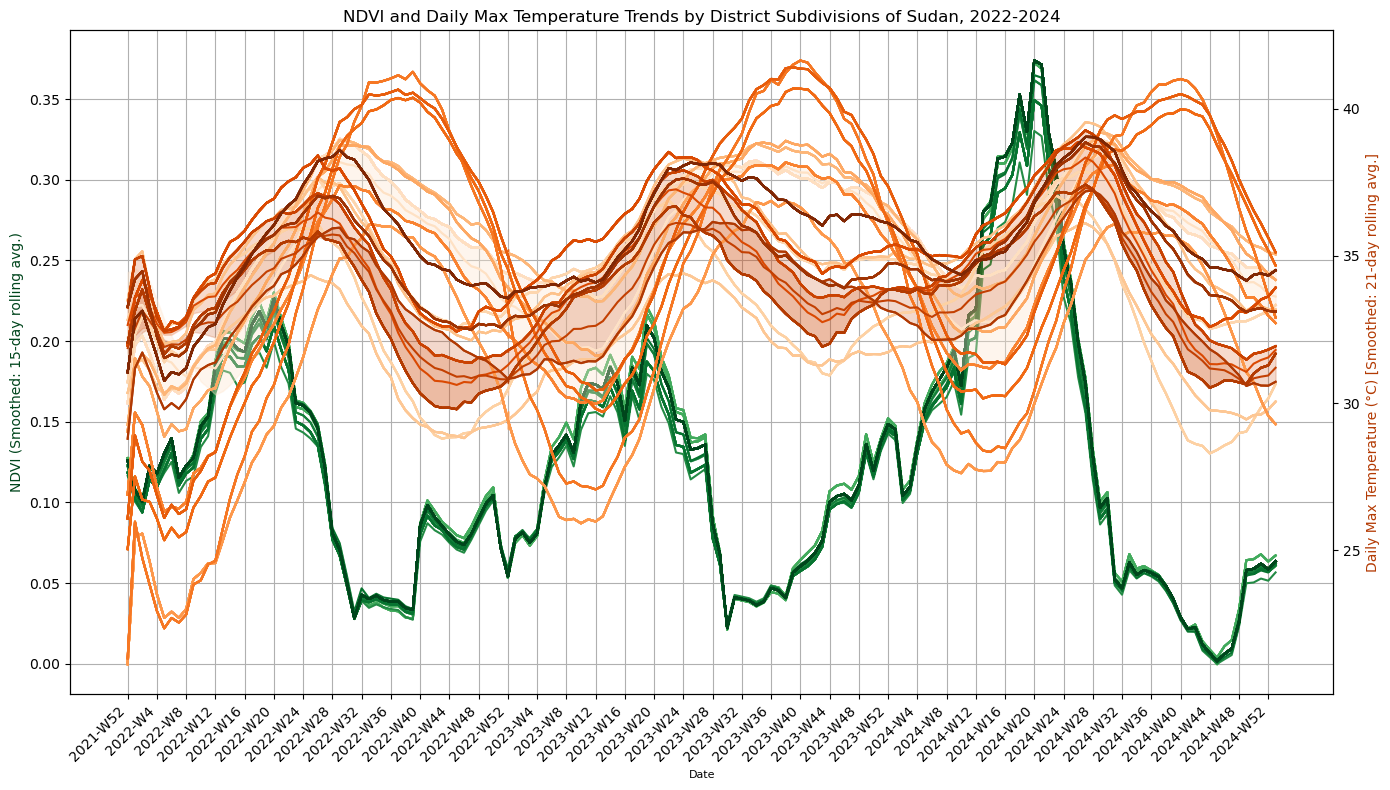

In [454]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=weather_sentinel_combined, x='year_week', y='ndvi_smoothed', hue='region', palette='Greens', legend=False)

ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot(data=weather_sentinel_combined, x='year_week', y='temp_max_smoothed', hue='region', ax=ax2, palette='Oranges', legend=False)

ax.set_xticks(range(0, len(weather_sentinel_combined['year_week'].unique()), 4))  # Show every 4th week
ax.set_xticklabels(weather_sentinel_combined['year_week'].unique()[::4], rotation=45, ha='right')  # Rotate labels for readability

ax.set_ylabel('NDVI (Smoothed: 15-day rolling avg.)', fontsize=10, color='#00451C')
ax2.set_ylabel('Daily Max Temperature (°C) [Smoothed: 21-day rolling avg.]', fontsize=10, color='#B33A03')
ax.set_xlabel('Date', fontsize=8)
ax.set_title('NDVI and Daily Max Temperature Trends by District Subdivisions of Sudan, 2022-2024', fontsize=12)
ax.grid(True)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax2.legend(lines_1 + lines_2, labels_1 + labels_2, title="District Subdivision", fontsize=1, loc='upper right')

plt.tight_layout()

plt.savefig("data/charts/ndvi_temp_max_trends_l3.png")
plt.show()

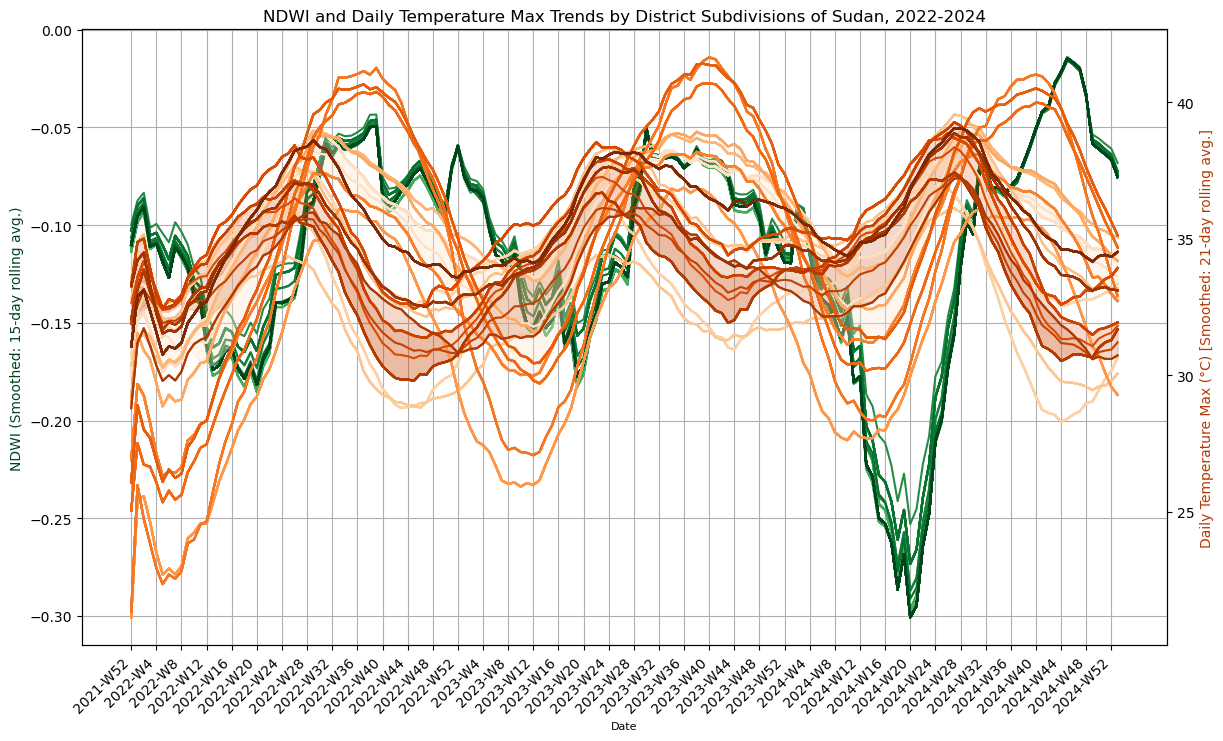

In [453]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=weather_sentinel_combined, x='year_week', y='ndwi_smoothed', hue='region', palette='Greens', legend=False)

ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot(data=weather_sentinel_combined, x='year_week', y='temp_max_smoothed', hue='region', ax=ax2, palette='Oranges', legend=False)

ax.set_xticks(range(0, len(weather_sentinel_combined['year_week'].unique()), 4))  # Show every 4th week
ax.set_xticklabels(weather_sentinel_combined['year_week'].unique()[::4], rotation=45, ha='right')  # Rotate labels for readability

ax.set_ylabel('NDWI (Smoothed: 15-day rolling avg.)', fontsize=10, color='#00451C')
ax2.set_ylabel('Daily Temperature Max (°C) [Smoothed: 21-day rolling avg.]', fontsize=10, color='#B33A03')
ax.set_xlabel('Date', fontsize=8)
ax.set_title('NDWI and Daily Temperature Max Trends by District Subdivisions of Sudan, 2022-2024', fontsize=12)
ax.grid(True)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax2.legend(lines_1 + lines_2, labels_1 + labels_2, title="District Subdivision", fontsize=1, loc='upper right')

plt.savefig("data/charts/ndwi_temp_max_trends_l3.png")
plt.show()

### Analysis by Region

In [189]:
import folium
from folium.plugins import TimeSliderChoropleth
import json

In [ ]:
# Create the Folium map
m = folium.Map(location=[12.8628, 30.2176], zoom_start=6, tiles="CartoDB positron")  # Centered on Sudan
m

In [ ]:
for _, r in gdf_geo.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["GEOMETRY_L3"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    folium.Popup(r["NAME_L3"]).add_to(geo_j)
    geo_j.add_to(m)
m

In [496]:
weather_sentinel_combined["geometry_simplified"] = weather_sentinel_combined["geometry"].apply(lambda x: gpd.GeoSeries(x).simplify(tolerance=0.001))

### Create colormap

In [594]:
ndvi_smoothed_sorted = sorted(list(weather_sentinel_combined.sort_values(by="ndvi_smoothed")["ndvi_smoothed"].unique()))

In [604]:
from branca.colormap import linear

cmap = linear.YlGnBu_09.scale(min(ndvi_smoothed_sorted), max(ndvi_smoothed_sorted))

In [620]:
colors = [cmap(x) for x in ndvi_smoothed_sorted[:-1]]

In [629]:
color_dict = {value: cmap(value) for value in ndvi_smoothed_sorted[:-1]}

In [631]:
weather_sentinel_combined["ndvi_smoothed_color"] = weather_sentinel_combined["ndvi_smoothed"].map(color_dict)

In [637]:
ndvi_trend["ndvi_smoothed_color"] = ndvi_trend["ndvi_smoothed"].map(color_dict)

In [646]:
ndvi_trend_subset = ndvi_trend[ndvi_trend["date"]>='2022-01-01'].copy().reset_index(drop=True)

In [ ]:
styledict={
    region: {
        date: {
            'color': ndvi_trend_subset[(ndvi_trend_subset["region"]==region)&(ndvi_trend_subset["date"]==date)]["ndvi_smoothed_color"],
            'opacity': 0.6
        }
        for date in list(ndvi_trend_subset[ndvi_trend_subset["region"]==region]["date"].values)
    }
    for region in list(ndvi_trend_subset["region"].unique())
}

In [2]:
## TODO: plot maps

In [ ]:
gdf_geo["geometry_l3_simplified"] = gdf_geo["GEOMETRY_L3"].apply(lambda x: gpd.GeoSeries(x).simplify(tolerance=0.001))

In [ ]:
import folium
from folium.plugins import TimeSliderChoropleth

In [ ]:
m = folium.Map(location=[12.8628, 30.2176], zoom_start=6, tiles="CartoDB positron")  # Centered on Sudan
m

In [ ]:
TimeSliderChoropleth(
    gdf_geo["geometry_simplified"].to_json(),
    styledict=styledict,
).add_to(m)

m